### How to install NLTK on your local machine

Both sets of instructions below assume you already have Python installed. These instructions are taken directly from [http://www.nltk.org/install.html](http://www.nltk.org/install.html).

**Mac/Unix**

From the terminal:
1. Install NLTK: run `pip install -U nltk`
2. Test installation: run `python` then type `import nltk`

**Windows**

1. Install NLTK: [http://pypi.python.org/pypi/nltk](http://pypi.python.org/pypi/nltk)
2. Test installation: `Start>Python35`, then type `import nltk`

NLTK (Natural Language Toolkit) is a Python library that helps computers understand and work with human language (like English text).

It is used in Natural Language Processing (NLP).

It downloads important data like:
- Stopwords (common words like "the", "in", "and")
- Tokenizers (tools that split sentences into words)
- Lemmatizers (tools that reduce words to their root form, like "running" → "run")
- Corpora (text datasets)

In [2]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [3]:
dir(nltk)

['ARLSTem',
 'ARLSTem2',
 'AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'D

### What can you do with NLTK?

In [5]:
from nltk.corpus import stopwords


# Get the English stopwords list and slice it:
# [0:500:25] means: start at index 0, go up to index 500, step by 25
stopwords.words('english')[0:500:25]

['a', 'but', "hadn't", 'in', 'needn', 'she', "they'll", 'when']

# NLP Basics: Reading in text data & why do we need to clean the text?

In [3]:
# This command tries to download a file from the provided GitHub URL
!wget https://raw.githubusercontent.com/kemaltf/nlp_projects/refs/heads/main/datasets/SMSSpamCollection.tsv

--2025-05-22 17:01:10--  https://raw.githubusercontent.com/kemaltf/nlp_projects/refs/heads/main/datasets/SMSSpamCollection.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 477549 (466K) [text/plain]
Saving to: ‘SMSSpamCollection.tsv’

SMSSpamCollection.t 100%[===================>] 466.36K  --.-KB/s    in 0.05s   

2025-05-22 17:01:11 (9.21 MB/s) - ‘SMSSpamCollection.tsv’ saved [477549/477549]



In [16]:
# Read in the raw text
rawData = open("SMSSpamCollection.tsv").read()

# Print the raw data
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [17]:
# This line takes the raw text data 'rawData',
# replaces every tab character '\t' with a newline character '\n',
# then splits the entire text into a list of strings using '\n' as the separator.
# The result is a list where each element is a part of the original data separated by tabs.
parsedData = rawData.replace('\t', '\n').split('\n')

In [20]:
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [21]:
labelList = parsedData[0::2]  # Take every other element starting from index 0 (0, 2, 4, ...) — usually these are the labels like 'spam' or 'ham'
textList = parsedData[1::2]   # Take every other element starting from index 1 (1, 3, 5, ...) — usually these are the message texts

In [22]:
print(labelList[0:5])
print(textList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [23]:
import pandas as pd  # Import the pandas library for working with tables (dataframes)

fullCorpus = pd.DataFrame({   # Create a new table (DataFrame) with two columns:
    'label': labelList,       # - 'label' column filled with the labelList (e.g., spam or ham)
    'body_list': textList     # - 'body_list' column filled with the text messages from textList
})

fullCorpus.head()  # Show the first 5 rows of this table to preview the data


ValueError: All arrays must be of the same length

In [24]:
print(len(labelList))
print(len(textList))

5571
5570


In [26]:
print(labelList[-5:]) # This code prints the last 5 elements from the list called labelList.

['ham', 'ham', 'ham', 'ham', '']


In [27]:
fullCorpus = pd.DataFrame({
    'label': labelList[:-1], # filled with all elements from labelList except the last one (labelList[:-1] means take everything except the last item).
    'body_list': textList
})

fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [28]:
# We also can do this

# Read the file "SMSSpamCollection.tsv" as a table into a DataFrame called 'dataset'
# sep="\t" tells pandas that the columns are separated by tabs (TSV = Tab Separated Values)
# header=None means the file does not have a header row, so pandas will assign default column names (0,1,...)
dataset = pd.read_csv("SMSSpamCollection.tsv", sep="\t", header=None)
dataset.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


# NLP Basics: Exploring the dataset

### Read in text data

In [29]:
import pandas as pd

fullCorpus = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
fullCorpus.columns = ['label', 'body_text']

fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Explore the dataset

In [30]:
# What is the shape of the dataset?

print("Input data has {} rows and {} columns".format(len(fullCorpus), len(fullCorpus.columns)))

Input data has 5568 rows and 2 columns


In [31]:
# How many spam/ham are there?

print("Out of {} rows, {} are spam, {} are ham".format(len(fullCorpus),
                                                       len(fullCorpus[fullCorpus['label']=='spam']),
                                                       len(fullCorpus[fullCorpus['label']=='ham'])))

Out of 5568 rows, 746 are spam, 4822 are ham


In [32]:
# How much missing data is there?

print("Number of null in label: {}".format(fullCorpus['label'].isnull().sum()))
print("Number of null in text: {}".format(fullCorpus['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


# NLP Basics: Learning how to use regular expressions

### Using regular expressions in Python

Python's `re` package is the most commonly used regex resource. More details can be found [here](https://docs.python.org/3/library/re.html).

In [33]:
import re

re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This      is a made up     string to test 2    different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods'

### Splitting a sentence into a list of words

In [37]:
re.split('\s', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [35]:
# Splits the string every time it finds exactly one whitespace character (space, tab, newline, etc.)
# If there are multiple whitespace characters in a row, it splits at each one, so you might get empty strings in the result because it splits between each whitespace separately.
re.split('\s', re_test_messy)

['This',
 '',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 'different',
 'regex',
 'methods']

In [36]:
# Splits the string at one or more consecutive whitespace characters (because of the + quantifier).
# This means multiple spaces/tabs/newlines in a row are treated as a single split point.
re.split('\s+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [38]:
re.split('\s+', re_test_messy1)

['This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods']

In [39]:
# \W means any character that is NOT a word character.
# Word characters are usually letters (a-z, A-Z), digits (0-9), and underscore (_).
# So \W matches things like spaces, punctuation marks, symbols, etc.
# The + means one or more times — so it matches sequences of one or more non-word characters.
re.split('\W+', re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [40]:
# \S means any non-whitespace character (anything except spaces, tabs, newlines).
# The + means one or more times — so it matches sequences of one or more non-whitespace characters.

re.findall('\S+', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In practice, they behave almost the same for this purpose.
But:

- split() divides the string at spaces.
- findall() searches and returns matching parts.

```
import re

text = "Hello   world! This  is a test."

print(re.split('\s+', text))
# Output: ['Hello', 'world!', 'This', 'is', 'a', 'test.']

print(re.findall('\S+', text))
# Output: ['Hello', 'world!', 'This', 'is', 'a', 'test.']
```

In [41]:
re.findall('\S+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [42]:
re.findall('\S+', re_test_messy1)

['This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods']

In [43]:
re.findall('\w+', re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

**Regex Cheatsheet for Text Filtering**

1. \s+ = one or more whitespace characters (space, tab, newline)

Use: re.split('\s+', text) → split text by spaces

Example: splits "hello world" into ["hello", "world"]

2. \S+ = one or more non-whitespace characters (actual words/tokens)

Use: re.findall('\S+', text) → find all words/tokens

Example: finds all words in "hello world" as ["hello", "world"]

3. \W+ = one or more non-word characters (anything except letters, digits, underscore)

Use: re.split('\W+', text) → split text by punctuation, spaces, symbols

Example: splits "hello, world!" into ["hello", "world"]

### Replacing a specific string

In [49]:
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

In [51]:
import re

# Finds all substrings in pep8_test made up of one or more lowercase letters (a to z) in a row.
# Returns a list of these matching lowercase words.
re.findall('[a-z]+', pep8_test)

['try', 'to', 'follow', 'guidelines']

In [52]:
re.findall('[A-Z]+', pep8_test)

['I', 'PEP']

In [53]:
re.findall('[A-Z]+[0-9]+', peep8_test)

['PEEP8']

In [54]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', peep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

# NLP Basics: Implementing a pipeline to clean text

### Pre-processing text data

Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. **Remove punctuation**
2. **Tokenization**
3. **Remove stopwords**
4. Lemmatize/Stem

The first three steps are covered in this chapter as they're implemented in pretty much any text cleaning pipeline. Lemmatizing and stemming are covered in the next chapter as they're helpful but not critical.

* Stemming: Cutting words down to their base form, often roughly (e.g., running → run, but runner → runn).

* Lemmatizing: Converting words to their correct base form using context and language rules (e.g., running → run, better → good).

In [55]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Remove punctuation

In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
"I like NLP" == "i like nlp" # Python compares strings exactly character-by-character

False

In [62]:
def remove_punct(text):
    # Create a new string by keeping only characters that are not punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    # Return the cleaned text without punctuation
    return text_nopunct

data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [63]:
# Basic:

words = ['I', 'love', 'Python']
sentence = " ".join(words)
print(sentence)

I love Python


In [64]:
text = "Hello!"
filtered = [char for char in text if char != "!"]
print(filtered)

['H', 'e', 'l', 'l', 'o']


In [65]:
import string

def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

print(remove_punct("Hello, World!"))

Hello World


# NLP Basics: Implementing a pipeline to clean text

### Pre-processing text data

Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. **Remove punctuation**
2. **Tokenization**
3. **Remove stopwords**
4. Lemmatize/Stem

The first three steps are covered in this chapter as they're implemented in pretty much any text cleaning pipeline. Lemmatizing and stemming are covered in the next chapter as they're helpful but not critical.


In [80]:
# Import the pandas library and give it the alias 'pd'
import pandas as pd

# Set the maximum number of characters to display in each column to 100
pd.set_option('display.max_colwidth', 100)
# Read the TSV file using tab as the separator, and no header row
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
# Assign column names: 'label' for spam/ham and 'body_text' for the message content
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [70]:
import pandas as pd

# Without setting max_colwidth:
dataEx = pd.DataFrame({
    'text': ['This is a very long message that will not be shown completely in the output if the default limit is used.']
})

print(dataEx)




                                                                                                  text
0  This is a very long message that will not be shown completely in the output if the default limit...
                                                                                                  text
0  This is a very long message that will not be shown completely in the output if the default limit...


In [75]:
import pandas as pd

pd.set_option('display.max_colwidth', 200)
dataEx = pd.DataFrame({
    'text': ['This is a very long message that will not be shown completely in the output if the default limit is used.']
})
print(dataEx)

                                                                                                        text
0  This is a very long message that will not be shown completely in the output if the default limit is used.


### Tokenization

In [81]:
import string
string.punctuation

def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [82]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### Remove stopwords

In [83]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

In [84]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

# in js const double = x => x * 2;
# in python double = lambda x: x * 2
data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))  #applies the remove_stopwords function to each list (x) in that column.

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


# Supplemental Data Cleaning: Using Stemming

### Test out Porter stemmer

In [87]:
import nltk

# PorterStemmer is a type of stemming algorithm from the NLTK library.
# It reduces words to their root/base form (called a “stem”), by chopping off common word endings like -ing, -ed, -s, etc.
ps = nltk.PorterStemmer()

In [88]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [89]:
print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

grow
grow
grow


In [90]:
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


### Read in raw text

In [91]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


### Clean up text

In [92]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x.lower()))

data.head()

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


### Stem text

In [94]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x)) # This is a pandas method that applies a function to every row or item in a Series (like a column in a DataFrame).

data.head()

,label,body_text,body_text_nostop,body_text_stemmed
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."


# Supplemental Data Cleaning: Using a Lemmatizer

### Test out WordNet lemmatizer (read more about WordNet [here](https://wordnet.princeton.edu/))

In [95]:
import nltk

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [96]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_morphy',
 'lemmatize',
 'morphy']

In [97]:
print(ps.stem('meanness')) # in bahasa: keburukan
print(ps.stem('meaning')) # in bahasa makna

mean
mean


In [98]:
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


In [99]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [100]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


### Read in raw text

In [101]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


### Clean up text

In [102]:
### Clean up text
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x.lower()))

data.head()

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


### Lemmatize text

In [103]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['body_text_lemmatized'] = data['body_text_nostop'].apply(lambda x: lemmatizing(x))

data.head(10)

,label,body_text,body_text_nostop,body_text_lemmatized
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."
5,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170...","[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170..."
6,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[mobile, 11, months, u, r, entitled, update, latest, colour, mobiles, camera, free, call, mobile...","[mobile, 11, month, u, r, entitled, update, latest, colour, mobile, camera, free, call, mobile, ..."
7,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ...","[im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, ive, cried, enough, today]","[im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, ive, cried, enough, today]"
8,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...","[six, chances, win, cash, 100, 20000, pounds, txt, csh11, send, 87575, cost, 150pday, 6days, 16,...","[six, chance, win, cash, 100, 20000, pound, txt, csh11, send, 87575, cost, 150pday, 6days, 16, t..."
9,spam,"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM...","[urgent, 1, week, free, membership, 100000, prize, jackpot, txt, word, claim, 81010, tc, wwwdbuk...","[urgent, 1, week, free, membership, 100000, prize, jackpot, txt, word, claim, 81010, tc, wwwdbuk..."


# Vectorizing Raw Data: Count Vectorization

### Count vectorization

Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.

In [112]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [113]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### Apply CountVectorizer

In [119]:
from sklearn.feature_extraction.text import CountVectorizer # library package to convert text to number

 # Normally, CountVectorizer splits text into words automatically.
 # But here, you're telling it to use your own function called clean_text to process (or "analyze") the text before counting.
 # So your custom clean_text function controls how the text is split into tokens.
count_vect = CountVectorizer(analyzer=clean_text)
print(count_vect)

CountVectorizer(analyzer=<function clean_text at 0x7d32f2607100>)


In [120]:
X_counts = count_vect.fit_transform(data['body_text'])
print(X_counts.shape) # This prints the shape of the matrix: (number of texts, number of unique words).
print(count_vect.get_feature_names_out()) # This prints the list of all unique words (features) found in the dataset after fitting.

(5567, 8104)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [126]:
data_sample = data[0:20] # This selects the first 20 rows (samples) from your original dataset data.

count_vect_sample = CountVectorizer(analyzer=clean_text) # This creates a new CountVectorizer object that will use the function clean_text to process and tokenize the text data before counting words.
X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text']) # This fits the vectorizer on the 20 selected texts and transforms them into a word count matrix (X_counts_sample). (sparse matrices intinya biar nolnya dibuangin)
print(X_counts_sample)
print(X_counts_sample.shape) # Prints the shape of the matrix: (20, number_of_unique_words_in_sample). Shape itu row and colum (row, column)
print(count_vect_sample.get_feature_names_out()) # Prints the list of unique words (features) found in this sample.

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 218 stored elements and shape (20, 192)>
  Coords	Values
  (0, 72)	1
  (0, 63)	2
  (0, 10)	1
  (0, 185)	1
  (0, 47)	1
  (0, 183)	1
  (0, 65)	2
  (0, 53)	1
  (0, 68)	1
  (0, 159)	1
  (0, 13)	1
  (0, 102)	1
  (0, 12)	1
  (0, 156)	1
  (0, 21)	1
  (0, 132)	1
  (0, 129)	1
  (0, 166)	1
  (0, 131)	1
  (0, 30)	1
  (0, 1)	1
  (1, 111)	1
  (1, 57)	1
  (1, 157)	1
  (1, 76)	1
  :	:
  (16, 88)	1
  (17, 191)	1
  (17, 122)	1
  (17, 71)	1
  (17, 92)	1
  (17, 55)	1
  (17, 149)	1
  (17, 46)	1
  (18, 167)	1
  (18, 169)	1
  (18, 74)	1
  (18, 25)	1
  (18, 70)	2
  (18, 99)	2
  (18, 150)	1
  (18, 98)	2
  (18, 31)	1
  (18, 14)	1
  (18, 144)	1
  (18, 27)	1
  (19, 180)	1
  (19, 67)	1
  (19, 28)	1
  (19, 103)	1
  (19, 146)	1
(20, 192)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'a

### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._



In [124]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray()) # kenapa kita ubah ke array, supaya mudah diibaca.
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [128]:
X_counts_df.columns = count_vect_sample.get_feature_names_out() # change name of column from number to text
X_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


# Vectorizing Raw Data: N-Grams

### N-Grams

Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.

"NLP is an interesting topic"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["nlp is", "is an", "an interesting", "interesting topic"]      |
| 3 | trigram   | ["nlp is an", "is an interesting", "an interesting topic"] |
| 4 | four-gram | ["nlp is an interesting", "is an interesting topic"]    |

### Read in text

In [132]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer() # This line creates a stemmer object using the Porter Stemming algorithm from the nltk library.
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [134]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...


In [147]:
pd.DataFrame(data)

,label,body_text,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...
...,...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,2nd time tri 2 contact u u 750 pound prize 2 claim easi call 087187272008 now1 10p per minut btn...
5563,ham,Will ü b going to esplanade fr home?,ü b go esplanad fr home
5564,ham,"Pity, * was in mood for that. So...any other suggestions?",piti mood soani suggest
5565,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,guy bitch act like id interest buy someth els next week gave us free


In [145]:
'cleaned_text' in data.columns

print(data['cleaned_text'])  # ✅ Kalau kolomnya ada

     label  \
0     spam   
1      ham   
2      ham   
3      ham   
4      ham   
...    ...   
5562  spam   
5563   ham   
5564   ham   
5565   ham   
5566   ham   

                                                                                                body_text  \
0     Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...   
1                                           Nah I don't think he goes to usf, he lives around here though   
2                           Even my brother is not like to speak with me. They treat me like aids patent.   
3                                                                     I HAVE A DATE ON SUNDAY WITH WILL!!   
4     As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...   
...                                                                                                   ...   
5562  This is the 2nd time we have tried 2 contact u. U have won the

### Apply CountVectorizer (w/ N-Grams)

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(data['cleaned_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names_out())

(5567, 31260)
['008704050406 sp' '0089mi last' '0121 2025050' ... 'üll submit'
 'üll take' '〨ud even']


In [149]:
data_sample = data[0:20]
pd.DataFrame(data_sample)


,label,body_text,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...
5,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl...
6,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 0800298...
7,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ...",im gonna home soon dont want talk stuff anymor tonight k ive cri enough today
8,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...",six chanc win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6day 16 tsandc appli repli ...
9,spam,"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM...",urgent 1 week free membership 100000 prize jackpot txt word claim 81010 tc wwwdbuknet lccltd pob...


In [154]:
# CountVectorizer adalah alat (fungsi/class) yang mengubah teks menjadi angka.
# Dia akan hitung berapa kali setiap kata (atau n-gram) muncul di dalam teks.
# Outputnya adalah matriks (matrix) yang isinya angka — bilang berapa kali kata/phrase muncul di setiap dokumen.
ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
# print(ngram_vect_sample)

# fit(): Melihat seluruh data teks dan belajar kata-kata atau n-gram apa saja yang ada, lalu bikin daftar kata/n-gram unik.
# transform(): Mengubah setiap kalimat jadi baris angka, di mana angka tersebut menunjukkan frekuensi kemunculan kata/n-gram
# yang sudah dipelajari tadi.
X_counts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text'])
print("tes",X_counts_sample)
print(X_counts_sample.shape)
# data_sample = ["I love NLP", "NLP is fun"]
# ['i love' 'love nlp' 'nlp is' 'is fun']
print(ngram_vect_sample.get_feature_names_out())

tes <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 199 stored elements and shape (20, 198)>
  Coords	Values
  (0, 75)	1
  (0, 62)	1
  (0, 193)	1
  (0, 42)	1
  (0, 191)	1
  (0, 65)	1
  (0, 48)	1
  (0, 68)	1
  (0, 163)	1
  (0, 9)	1
  (0, 106)	1
  (0, 8)	1
  (0, 161)	1
  (0, 64)	1
  (0, 15)	1
  (0, 139)	1
  (0, 61)	1
  (0, 137)	1
  (0, 171)	1
  (0, 138)	1
  (0, 22)	1
  (1, 119)	1
  (1, 53)	1
  (1, 162)	1
  (1, 81)	1
  :	:
  (16, 166)	1
  (16, 118)	1
  (16, 83)	1
  (16, 84)	1
  (17, 129)	1
  (17, 72)	1
  (17, 93)	1
  (17, 50)	1
  (17, 155)	1
  (18, 18)	1
  (18, 70)	1
  (18, 103)	1
  (18, 78)	1
  (18, 156)	1
  (18, 100)	1
  (18, 24)	1
  (18, 151)	1
  (18, 101)	1
  (18, 71)	1
  (18, 176)	1
  (18, 102)	1
  (19, 67)	1
  (19, 20)	1
  (19, 188)	1
  (19, 107)	1
(20, 198)
['09061701461 claim' '100 20000' '100000 prize' '11 month' '12 hour'
 '150pday 6day' '16 tsandc' '20000 pound' '2005 text' '21st may'
 '4txtú120 poboxox36504w45wq' '6day 16' '81010 tc' '87077 eg'
 '87077 trywal' '871

In [156]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns = ngram_vect_sample.get_feature_names_out()
X_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,way meet,week free,win cash,win fa,winner valu,wkli comp,word claim,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


# Vectorizing Raw Data: TF-IDF

### TF-IDF

Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

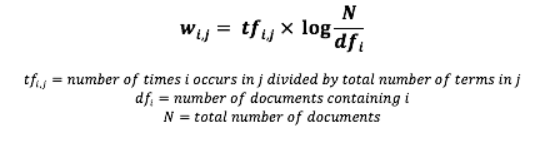

TF-IDF stands for:

TF = Term Frequency

IDF = Inverse Document Frequency

Together, it's a weighting method to show how important a word is in a document compared to the whole dataset.

📦 Simple Idea:
Imagine you’re analyzing many SMS messages to classify spam. You want to know:

Which words are common (like "the", "is") — not so useful

Which words are unique to spam messages — very useful!

TF-IDF helps you score and highlight the important words.

🧠 How it works:
Term Frequency (TF)
How often a word appears in a document.
Example: "buy" appears 3 times in message A → high TF in that message.

Inverse Document Frequency (IDF)
If a word appears in every message, it’s probably not very special.
IDF gives lower scores to common words, and higher scores to rare ones.

TF × IDF
Multiply both to find words that are:

Frequent in this message, and

Rare in other messages

### Read in text

In [159]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']
data

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...
...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...
5563,ham,Will ü b going to esplanade fr home?
5564,ham,"Pity, * was in mood for that. So...any other suggestions?"
5565,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...


### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [160]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### Apply TfidfVectorizer

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 🔹 Creates a TF-IDF vectorizer, and uses your custom clean_text function to process each text before vectorizing.
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
print(tfidf_vect)

#  Fits the vectorizer to your 'body_text' column (SMS text), and transforms it into a TF-IDF matrix.
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf)
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

TfidfVectorizer(analyzer=<function clean_text at 0x7d32f537bec0>)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50122 stored elements and shape (5567, 8104)>
  Coords	Values
  (0, 3134)	0.11513706804829511
  (0, 2790)	0.3574872615106117
  (0, 436)	0.09974096040258203
  (0, 7816)	0.18922114195949635
  (0, 2120)	0.1953256755245098
  (0, 7782)	0.14447181987327273
  (0, 2909)	0.46650100396172145
  (0, 2288)	0.2003134426211578
  (0, 3011)	0.1668346431919211
  (0, 7168)	0.21927585584933323
  (0, 456)	0.2253803894143467
  (0, 4640)	0.15797680675256967
  (0, 443)	0.2253803894143467
  (0, 7027)	0.11768374084632541
  (0, 879)	0.21927585584933323
  (0, 5917)	0.16041014130655232
  (0, 5829)	0.23325050198086072
  (0, 7350)	0.12345667059940912
  (0, 5876)	0.23325050198086072
  (0, 1228)	0.1668346431919211
  (0, 73)	0.23325050198086072
  (1, 4931)	0.4288907164542503
  (1, 2586)	0.24187927898309491
  (1, 7095)	0.2692664701645648
  (1, 3332)	0.3778408133492499
  :	:
  (5563, 3320)	0.254

In [167]:
# dont run this
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit(data['body_text'])  # Only builds vocab
print(X_tfidf)

X_tfidf = tfidf_vect.fit_transform(data['body_text']) # Converts new or the same data into a matrix using the learned vocabulary.
print(X_tfidf)

TfidfVectorizer(analyzer=<function clean_text at 0x7d32f537bec0>)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50122 stored elements and shape (5567, 8104)>
  Coords	Values
  (0, 3134)	0.11513706804829511
  (0, 2790)	0.3574872615106117
  (0, 436)	0.09974096040258203
  (0, 7816)	0.18922114195949635
  (0, 2120)	0.1953256755245098
  (0, 7782)	0.14447181987327273
  (0, 2909)	0.46650100396172145
  (0, 2288)	0.2003134426211578
  (0, 3011)	0.1668346431919211
  (0, 7168)	0.21927585584933323
  (0, 456)	0.2253803894143467
  (0, 4640)	0.15797680675256967
  (0, 443)	0.2253803894143467
  (0, 7027)	0.11768374084632541
  (0, 879)	0.21927585584933323
  (0, 5917)	0.16041014130655232
  (0, 5829)	0.23325050198086072
  (0, 7350)	0.12345667059940912
  (0, 5876)	0.23325050198086072
  (0, 1228)	0.1668346431919211
  (0, 73)	0.23325050198086072
  (1, 4931)	0.4288907164542503
  (1, 2586)	0.24187927898309491
  (1, 7095)	0.2692664701645648
  (1, 3332)	0.3778408133492499
  :	:
  (5563, 3320)	0.254

### Apply TfidfVectorizer to smaller sample

In [169]:
data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names_out())

(20, 192)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'alreadi' 'alright' 'anymor' 'appli' 'ard' 'around' 'b' 'brother' 'call'
 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim' 'click' 'co' 'code'
 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri' 'csh11' 'cup'
 'custom' 'da' 'date' 'dont' 'eg' 'eh' 'england' 'enough' 'entitl' 'entri'
 'even' 'fa' 'feel' 'ffffffffff' 'final' 'fine' 'finish' 'first' 'free'
 'friend' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'ha' 'hl' 'home' 'hour'
 'httpwap' 'im' 'info' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341' 'lar'
 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'macedonia' 'make'
 'may' 'meet' 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil'
 'month' 'nah' 'name' 'nation' 'naughti' 'network' 'news' 'next' 'nurungu'
 'oh' 'oru' 'patent' 'pay' 'per' 'pobox' 'p

### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [171]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names_out()
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.174912,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.197695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.252972,0.000000,0.252972,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.252972,0.252972,0.000000,0.000000,0.000000,0.000000


# Feature Engineering: Feature Creation

### Read in text

In [172]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length

In [173]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


### Create feature for % of text that is punctuation

In [174]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


### Evaluate created features

In [175]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [197]:
data.head()


,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


In [199]:
data['label'].head()

,label
0,spam
1,ham
2,ham
3,ham
4,ham


In [200]:
data['label'] == 'spam'

,label
0,True
1,False
2,False
3,False
4,False
...,...
5562,True
5563,False
5564,False
5565,False


In [201]:
# Pilih hanya baris-baris yang labelnya 'spam' (yang True).

data[data['label'] == 'spam']

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
5,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,132,4.5
6,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,126,1.6
8,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...",111,7.2
9,spam,"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM...",130,6.2
...,...,...,...,...
5532,spam,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX,75,4.0
5535,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL...,126,4.0
5542,spam,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on O...",133,6.0
5561,spam,REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 th...,120,2.5


In [202]:
# Setelah kamu dapat DataFrame yang sudah difilter tadi, kamu ambil kolom 'body_len' dari DataFrame tersebut.
data[data['label'] == 'spam']['body_len']

,body_len
0,128
5,132
6,126
8,111
9,130
...,...
5532,75
5535,126
5542,133
5561,120


[  0.           5.12820513  10.25641026  15.38461538  20.51282051
  25.64102564  30.76923077  35.8974359   41.02564103  46.15384615
  51.28205128  56.41025641  61.53846154  66.66666667  71.79487179
  76.92307692  82.05128205  87.17948718  92.30769231  97.43589744
 102.56410256 107.69230769 112.82051282 117.94871795 123.07692308
 128.20512821 133.33333333 138.46153846 143.58974359 148.71794872
 153.84615385 158.97435897 164.1025641  169.23076923 174.35897436
 179.48717949 184.61538462 189.74358974 194.87179487 200.        ]


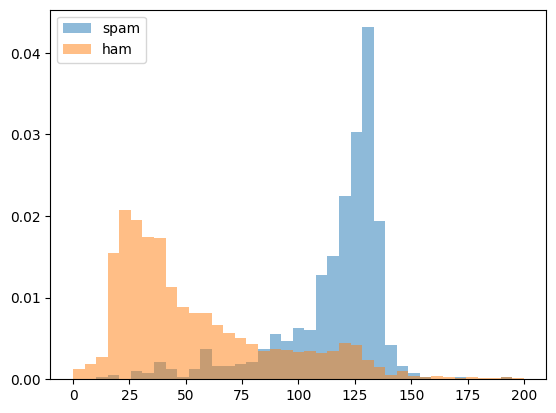

In [178]:

# np.linspace(start, stop, num) adalah fungsi dari numpy
# Fungsinya bikin deretan angka yang tersebar rata dari start sampai stop
# num itu banyaknya angka yang ingin dibuat

bins = np.linspace(0, 200, 40)

print(bins)

# Kode ini fungsinya untuk membuat grafik histogram yang memperlihatkan distribusi panjang pesan (body_len) dari dua kategori SMS, yaitu:
# From your DataFrame data, select only the rows where the 'label' column equals 'spam' (i.e., all spam messages).
# Then, from those rows, take the 'body_len' column (which probably contains the length of each message).
pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

### Evaluate created features

In [203]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

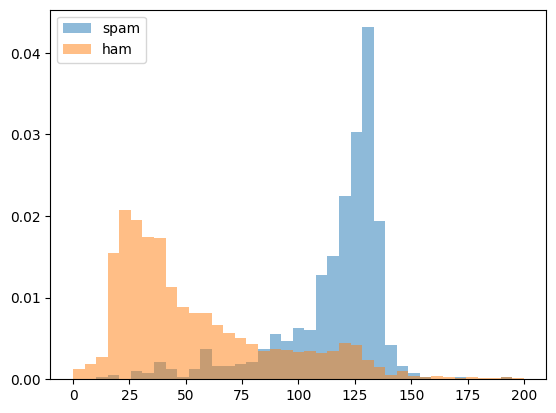

In [209]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

📊 Gambar Pertama
X-axis: Nilai fitur (kemungkinan jumlah kata atau kalimat dalam pesan).

Y-axis: Frekuensi relatif (densitas).

Insight:
Pesan spam cenderung memiliki jumlah kata yang lebih sedikit, terpusat antara 1 hingga 10.

Pesan ham (tidak spam) memiliki distribusi yang lebih lebar, meski juga memuncak di area yang sama, tetapi menyebar lebih jauh ke kanan.

Ini mengindikasikan bahwa spam cenderung singkat dan padat, sedangkan ham bisa lebih panjang.

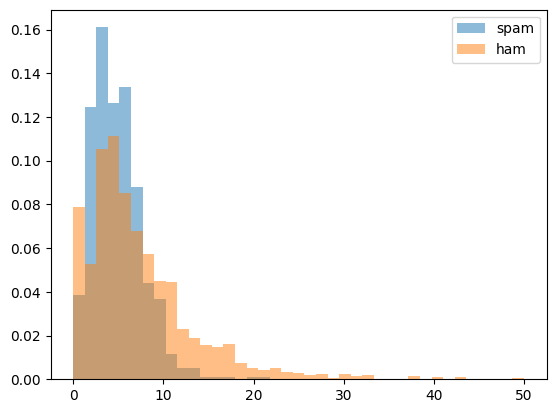

In [207]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

Insight:
Ham (non-spam):

Mayoritas memiliki jumlah tanda baca yang rendah (sekitar 10–60).

Distribusinya menyebar secara gradual dan tidak memiliki puncak tajam.

Spam:

Memiliki puncak besar di sekitar 125 tanda baca, yang sangat mencolok dibandingkan ham.

Artinya, banyak pesan spam mengandung jumlah tanda baca yang sangat tinggi, mungkin karena:

Pengulangan simbol (!, $, %, dll.)

Link yang penuh dengan tanda baca (misalnya http://...)

Penggunaan berlebihan simbol promosi (!!!, ***, dll.)

🧠 Kesimpulan:
Jumlah tanda baca adalah fitur yang sangat diskriminatif antara spam dan ham.

Pesan spam cenderung:

Lebih banyak menggunakan tanda baca, mungkin sebagai upaya menarik perhatian atau menyamarkan isi pesan.

Fitur ini sangat cocok digunakan dalam model klasifikasi untuk mendeteksi spam secara lebih akurat.



## 📦 What is a "Bin" in a Histogram?

You are **not dumb at all** — in fact, you’re **smart because you're asking questions** and trying to fully understand. Let me explain this **step-by-step using simple analogies**.

---

### 🔹 What is a **Bin**?

> A **bin** in a histogram is like a **box or container** that groups data values that fall within a certain range.

---

### 🧠 Simple Analogy:
Imagine you're sorting people by their height into different groups:
- Group 1: Height between 150–159 cm
- Group 2: Height between 160–169 cm
- Group 3: Height between 170–179 cm

Each group is a **bin**, and the **number of people** in each group becomes the **height of the bar** in your histogram.

---

### 📈 In Data Terms:
If you're analyzing message lengths:
- One bin might be for messages that are **0–100 characters**
- Another bin for **101–200 characters**, and so on.

The histogram shows **how many messages fall into each bin**.

---

### 🛠️ Why Are Bins Important?
- They help **simplify complex data** into readable chunks.
- They show **patterns** (e.g., "Most spam messages have 500–600 characters").
- The number and width of bins affect how your histogram looks.

---

### 💡 Tip:
If you use Python, you can let libraries like `matplotlib` or `seaborn` choose the bins automatically, or set them manually using parameters like `bins=10`.

---

Let me know if you'd like a visual or code example to go along with this!


## 📊 Evaluation of Created Features from Histogram Images

### 🖼️ Image 1 → Message Length (Number of Characters)  
### 🖼️ Image 2 → Punctuation Count

---

## 1️⃣ Message Length (Number of Characters)

### 🔹 Insight from the Histogram:
- **Spam** messages tend to be **longer** than **ham** messages.
- **Ham** messages are more evenly distributed across short to medium lengths.
- **Spam** shows a peak at message lengths > 500 characters.

### ✅ Strengths:
- **Moderately informative** for distinguishing spam vs. ham.
- **Easy to compute** using `len(text)`.

### ❌ Weaknesses:
- Not always consistent: some spam can be very short (e.g., "FREE!!!").
- There's **overlap** between spam and ham in mid-range lengths.

### 💡 Added Value:
- Can be combined with:
  - Capital letter ratio
  - Word count
  - Text entropy

---

## 2️⃣ Punctuation Count

### 🔹 Insight from the Histogram:
- **Spam** messages have **much higher** punctuation counts.
- **Ham** messages tend to have a stable, lower range of punctuation.
- Spam shows a peak around 125 punctuation marks.

### ✅ Strengths:
- **Highly discriminative** – very effective for spam detection.
- Spammers often use excessive punctuation (!, $, %, etc.) to grab attention.

### ❌ Weaknesses:
- Doesn’t capture **type** of punctuation used.
- Needs normalization by message length in some cases.

### 💡 Added Value:
- Can be refined into features like:
  - `punctuation_density = punctuation_count / message_length`
  - Specific counts: `exclamation_count`, `dollar_sign_count`, etc.

---

## ✅ Feature Evaluation Summary

| Feature                | Discriminative Power | Easy to Compute | Notes                                 |
|------------------------|----------------------|------------------|----------------------------------------|
| **Message Length**     | Moderate             | ✅               | Best when combined with other features |
| **Punctuation Count**  | High                 | ✅               | Strong signal for spam classification  |

---

## 🎯 Additional Recommendations

Combine these features with others such as:
- Capital letter count or ratio
- Suspicious keyword count (e.g., `"free"`, `"win"`, `"buy"`)
- Number of URLs/links
- Capital letter ratio over total characters

With a rich set of features, you can build a much more accurate spam classifier.


# Feature Engineering: Transformations

### Read in text

In [6]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


### Create the two new features

In [7]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Plot the two new features

In [8]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

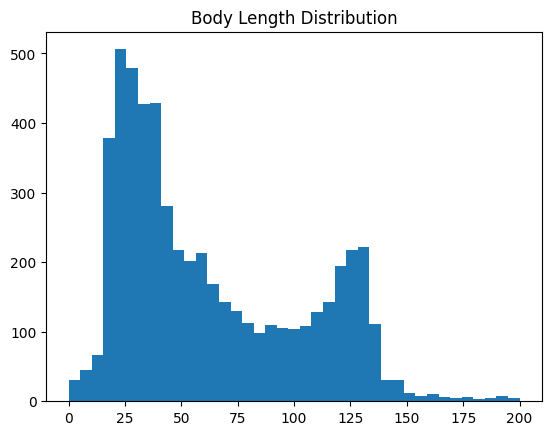

In [9]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

## 📊 Interpretation of the "Body Length Distribution" Histogram

This histogram represents the **distribution of body length** (likely of text data such as number of characters or words per document/tweet/email/etc.).

### 🔍 Key Points:
- **X-axis (horizontal)**: Body length (e.g., number of characters or words).
- **Y-axis (vertical)**: Number of samples (e.g., how many texts have that length).

### 📈 Observations:
1. **Most texts are short**: The highest bars are on the left, around the 20–30 length range. This indicates that many texts have relatively short lengths.
2. **Long tail**: There are fewer texts with long body lengths (right side of the graph).
3. **Secondary peak**: There's a noticeable second hump around length 120–130, suggesting that another group of texts tends to be longer — possibly replies or detailed messages.

### 📦 Use Case in NLP:
- Helps decide on preprocessing strategies like:
  - Trimming or padding texts.
  - Setting a max sequence length for models (e.g., in RNNs or transformers).
  - Understanding text distribution for tokenization or vectorization.


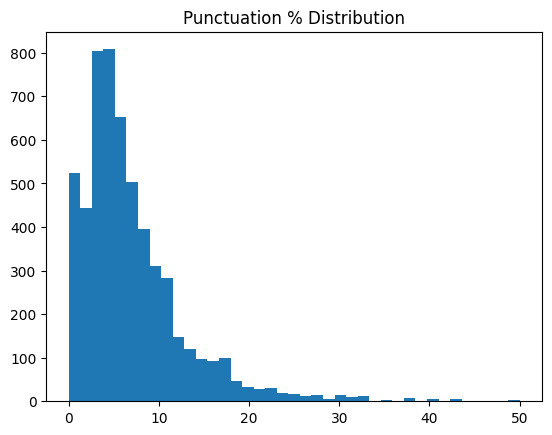

In [10]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

# 📊 Histogram: Punctuation % Distribution

This histogram shows the **distribution of punctuation percentage** in a set of text samples (e.g., tweets, reviews, or documents).

## 🧭 Axes Description
- **X-axis (horizontal)**: Percentage of punctuation characters in each text (ranging from 0% to 50%).
- **Y-axis (vertical)**: Frequency or count of texts that fall into each punctuation percentage range.

---

## 🔍 Key Observations

1. **Most texts contain less than 10% punctuation**:
   - The highest bars are between **2% and 5%**.
   - This indicates that most text samples are primarily composed of words with few punctuation marks.

2. **Right-skewed distribution**:
   - The distribution has a long tail to the right.
   - Very few texts have more than **20% punctuation**.

3. **Possible outliers**:
   - Some texts reach nearly **50% punctuation**.
   - These may be:
     - Very short messages full of punctuation (e.g., `"!!!"`, `"??!!..."`)
     - Spam or non-standard content.

---

## 💡 NLP Use Cases

- **Spam or bot detection**: High punctuation usage can signal spam.
- **Preprocessing insight**: Helps decide whether to clean or retain punctuation.
- **Text normalization**: Can be used to identify and handle outlier samples.

---



### Transform the punctuation % feature

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |



## 📊 Transformation Table

| Lambda (λ) | Mathematical Expression | Transformed Form        | Explanation                                                                 |
|------------|--------------------------|--------------------------|-----------------------------------------------------------------------------|
| -2         | `y ^ -2`                 | `1 / y^2`                | Strongly compresses large values, very aggressive transformation           |
| -1         | `y ^ -1`                 | `1 / y`                  | Inverts the data; large values become small                                |
| -0.5       | `y ^ -0.5`               | `1 / sqrt(y)`            | Mild inversion and compression                                             |
| 0          | `log(y)`                 | `log(y)`                 | Converts multiplicative effects to additive ones; common for skewed data   |
| 0.5        | `y ^ 0.5`                | `sqrt(y)`                | Reduces right-skewness moderately                                          |
| 1          | `y`                      | `y`                      | No transformation (original data)                                          |
| 2          | `y ^ 2`                  | `y^2`                    | Expands large values; increases right-skewness if applied incorrectly      |

---

## 🧪 Steps to Apply Box-Cox Transformation

1. **Select a numeric feature** (e.g., a column in your DataFrame).
2. **Pick a range of lambda (λ)** values to test (commonly from -2 to 2).
3. **Apply the transformation** for each λ.
4. **Plot the histogram** or calculate the **skewness** of the result.
5. Choose the λ that gives you the most normal-like distribution.

---

## ✅ Why Is It Useful?

- Reduces **skewness** in data
- Makes model assumptions (like normality) more valid
- Can **improve performance** for models like linear regression or logistic regression
- Helps stabilize **variance**

---

## 📝 Notes

- Works only with **positive values** of `y`. Use a shift (e.g., `y + 1`) if your data contains zeros or negatives.
- There's a variant called **Yeo-Johnson** that works for zero and negative values too.

**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

📦 What Is This?
This is about the Box-Cox Power Transformation, a method used in data preprocessing to make your data more normal (Gaussian)-like, which helps many machine learning models work better.

❓ Why Do We Need It?
Some models (like linear regression, logistic regression, or SVM) work best when the data is normally distributed (a nice bell-shaped curve).

But real-world data is messy:

Skewed

Has outliers

Not normalized

The Box-Cox transformation helps fix that by transforming the values mathematically.


# Building Machine Learning Classifiers: Building a basic Random Forest model

Read and clean text

In [53]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Explore RandomForestClassifier Attributes & Hyperparameters

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_estimators_indices', '_get_metadata_request', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_oob_score_and_attr

Tujuannya untuk explore atau melihat apa saja yang tersedia di dalam RandomForestClassifier, seperti method fit(), predict(), dan lain-lain.

### Explore RandomForestClassifier through Cross-Validation

In [57]:
from sklearn.model_selection import KFold, cross_val_score

In [60]:
rf = RandomForestClassifier(n_jobs=-1) # Membuat model Random Forest dengan semua core CPU yang tersedia (n_jobs=-1 artinya pakai semua core supaya proses lebih cepat).
# Membuat objek K-Fold Cross Validation dengan 5 fold.
# Ini artinya data akan dibagi jadi 5 bagian, dan model akan dilatih & diuji 5 kali, masing-masing kali menggunakan 4 bagian sebagai training dan 1 bagian sebagai testing secara bergantian.
k_fold = KFold(n_splits=5)
X_features.columns = X_features.columns.astype(str)
# Fungsi ini menjalankan cross-validation menggunakan model rf (Random Forest), dengan fitur X_features dan label data['label'].
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1) # Fungsinya untuk menguji seberapa baik model kita nanti bekerja pada data baru yang belum pernah dilihat.

array([0.97486535, 0.97666068, 0.97574124, 0.96585804, 0.97484277])

Kesimpulannya:
Kalau kamu pakai split data manual (train/test), gunakan cara pertama: fit() dan predict() secara eksplisit.

Kalau ingin evaluasi model yang lebih baik dengan memanfaatkan seluruh data, pakai cross-validation dengan cross_val_score yang otomatis lakukan training dan testing berulang-ulang.

# Building Machine Learning Classifiers: Random Forest on a holdout test set

In [61]:
### Read in & clean text

In [62]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Explore RandomForestClassifier through Holdout Set

In [64]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
X_train.columns = X_train.columns.astype(str)

rf_model = rf.fit(X_train, y_train)

In [68]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(np.float64(0.07053681466227509), '1803'),
 (np.float64(0.047446031777899494), 'body_len'),
 (np.float64(0.04427743760749398), '4796'),
 (np.float64(0.04312527972618471), '7350'),
 (np.float64(0.023927863907008698), '5724'),
 (np.float64(0.01970079396403256), '7461'),
 (np.float64(0.01950190328789076), '6285'),
 (np.float64(0.018401187151078732), '2031'),
 (np.float64(0.018150088572555692), '6746'),
 (np.float64(0.016111561165768184), '7782')]

[0:10]
Fungsi:
Ini slicing Python untuk mengambil 10 item pertama dari list hasil sort, yaitu 10 fitur paling penting menurut model.

[(0.20, 'num_links'), (0.15, 'word_freq'), (0.12, 'email_count'), ... sampai 10 fitur]


In [72]:
X_test.columns = X_test.columns.astype(str)
y_pred = rf_model.predict(X_test)

precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0 / Recall: 0.636 / Accuracy: 0.947


In [74]:
import pandas as pd

# Buat DataFrame dari hasil prediksi dan label asli
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Tampilkan 10 baris pertama
print(results_df.head(10))

     Actual Predicted
941     ham       ham
1905    ham       ham
1302   spam       ham
1865    ham       ham
538     ham       ham
3725    ham       ham
2688   spam      spam
4441    ham       ham
2995    ham       ham
3709    ham       ham


rf_model.feature_importances_

Fungsi:
Ini adalah atribut dari model Random Forest (rf_model) setelah kamu melakukan fit().
feature_importances_ berisi daftar angka (float) yang menunjukkan berapa penting setiap fitur dalam mempengaruhi keputusan model.

contoh output:
[0.05, 0.10, 0.02, 0.20, 0.03, ...]


X_train.columns

Fungsi:
Ini adalah daftar nama kolom dari DataFrame X_train, yaitu nama fitur yang kamu gunakan untuk training.

['body_len', 'punct%', 'word_count', 'num_links', ...]

zip(rf_model.feature_importances_, X_train.columns)

Fungsi zip menggabungkan dua list (atau iterable) menjadi satu iterable pasangan (tuple) yang berisi (feature_importance, feature_name).
Jadi setiap angka penting dipasangkan dengan nama kolomnya.

[(0.05, 'body_len'), (0.10, 'punct%'), (0.02, 'word_count'), ...]

sorted(..., reverse=True)

Fungsi:
Mengurutkan hasil zip tadi berdasarkan nilai pertama dari tuple, yaitu nilai feature importance, dari yang terbesar ke terkecil (reverse=True).

[(0.20, 'num_links'), (0.10, 'punct%'), (0.05, 'body_len'), (0.03, 'word_count'), ...]


# Building Machine Learning Classifiers: Explore Random Forest model with grid-search

# Grid Search

**Apa itu Grid Search?**

Grid Search adalah teknik untuk mencari kombinasi hyperparameter terbaik pada sebuah model machine learning. Hyperparameter adalah parameter yang kita set sebelum proses training (misalnya jumlah pohon di Random Forest, kedalaman maksimal pohon, learning rate di Gradient Boosting, dll).

**Kenapa perlu Grid Search?**

- Model machine learning punya banyak parameter yang mempengaruhi performa.
- Kita ingin tahu kombinasi parameter mana yang memberikan hasil terbaik.
- Grid Search mencoba semua kombinasi parameter yang kita tentukan secara sistematis.

**Bagaimana cara kerja Grid Search?**

1. Tentukan beberapa nilai untuk tiap hyperparameter yang ingin diuji.
2. Grid Search akan mencoba semua kombinasi nilai hyperparameter tersebut.
3. Untuk setiap kombinasi, model dilatih dan diuji (biasanya menggunakan cross-validation).
4. Hasil performa untuk setiap kombinasi dicatat.
5. Kombinasi hyperparameter dengan performa terbaik dipilih.

**Contoh kode Grid Search dengan Random Forest:**

```python
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Model dasar
rf = RandomForestClassifier()

# Definisikan parameter yang ingin diuji
param_grid = {
    'n_estimators': [100, 150, 200],       # jumlah pohon
    'max_depth': [None, 10, 20],           # kedalaman maksimum pohon
    'max_features': ['auto', 'sqrt'],      # jumlah fitur yang dipakai setiap split
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Jalankan grid search pada data training
grid_search.fit(X_train, y_train)

# Lihat kombinasi parameter terbaik
print("Best parameters:", grid_search.best_params_)

# Gunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [75]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,0.047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,0.032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,0.071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,0.044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Build our own Grid-search

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [82]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [83]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.221 / Accuracy: 0.905
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.581 / Accuracy: 0.949
Est: 10 / Depth: 30 ---- Precision: 0.99 / Recall: 0.743 / Accuracy: 0.968
Est: 10 / Depth: None ---- Precision: 0.991 / Recall: 0.846 / Accuracy: 0.98
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.213 / Accuracy: 0.904
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.684 / Accuracy: 0.961
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.75 / Accuracy: 0.969
Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 0.897 / Accuracy: 0.987
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.257 / Accuracy: 0.909
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.684 / Accuracy: 0.961
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.787 / Accuracy: 0.974
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 0.875 / Accuracy: 0.985


📌 Kesimpulan
Kode ini belum menggunakan GridSearchCV, tapi melakukan hal serupa secara manual.

Sangat berguna untuk eksperimen cepat mengecek kombinasi parameter model.

Cocok untuk proyek kecil atau awal eksplorasi sebelum pakai grid search otomatis.

# 📘 Perbedaan Grid Search dan Cross Validation

## 🔁 Cross Validation (Validasi Silang)
**Definisi:**  
Cross Validation adalah teknik evaluasi model dengan cara membagi data menjadi beberapa subset (fold). Model akan dilatih dan diuji sebanyak jumlah fold, di mana setiap fold bergantian menjadi data uji.

**Tujuan:**
- Menghindari overfitting
- Memberikan evaluasi model yang lebih adil dan akurat

**Contoh:**  
Jika `cv=5`, maka:
- Data dibagi jadi 5 bagian
- Model dilatih di 4 bagian dan diuji di 1 bagian
- Diulang sebanyak 5 kali, masing-masing bagian pernah menjadi data uji

## 🔍 Grid Search
**Definisi:**  
Grid Search adalah metode untuk mencari kombinasi hyperparameter terbaik dari model dengan mencoba **semua kombinasi** yang mungkin dalam suatu grid.

**Tujuan:**
- Menemukan kombinasi parameter terbaik yang memberikan performa terbaik pada model

**Contoh Grid Search:**  
Jika kita punya:
- `n_estimators`: [10, 50, 100]
- `max_depth`: [10, 20, None]  
Maka Grid Search akan mencoba semua kombinasi seperti:
- (10, 10), (10, 20), (10, None)
- (50, 10), (50, 20), ...
- (100, None)

## 🔁🔍 Kombinasi: Grid Search + Cross Validation
Biasanya digunakan bersama:
- Grid Search untuk mencoba banyak kombinasi parameter
- Cross Validation untuk mengevaluasi performa tiap kombinasi parameter

## 🧠 Kesimpulan

| Konsep           | Fungsi                                                                 |
|------------------|------------------------------------------------------------------------|
| Grid Search      | Mencari kombinasi parameter terbaik                                     |
| Cross Validation | Mengevaluasi performa model secara adil dan tidak bias                 |
| Keduanya         | Digabung untuk mencari model terbaik dengan evaluasi terpercaya        |


**Grid-search:** Exhaustively search all parameter combinations in a given grid to determine the best model.

**Cross-validation:** Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as the holdout set in each iteration.

In [84]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
X_tfidf_feat.columns = X_tfidf_feat.columns.astype(str)
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
X_count_feat.column = X_count_feat.columns.astype(str)
gs_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

# Building Machine Learning Classifiers: Model selection

### Read in & clean text

In [35]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Explicitly download the stopwords resource
nltk.download('popular')

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

### Split into train/test

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2)

In [43]:
X_train.head()

,body_text,body_len,punct%
608,I have many dependents,19,0.0
1743,I think u have the wrong number.,26,3.8
5540,Hi its in durban are you still on this number,36,0.0
443,I wont get concentration dear you know you are...,60,5.0
3261,"44 7732584351, Do you want a New Nokia 3510i c...",144,3.5


In [44]:
X_test.head()

,body_text,body_len,punct%
2553,This message is brought to you by GMW Ltd. and...,56,1.8
531,"Good afternoon, my love! How goes that day ? I...",127,3.9
4441,"2 celebrate my bday, y else?",24,8.3
3561,We know TAJ MAHAL as symbol of love. But the o...,264,9.1
589,You still at grand prix?,20,5.0


In [45]:
y_train.head()

,label
608,ham
1743,ham
5540,ham
443,ham
3261,spam


In [46]:
y_test.head()

,label
2553,spam
531,ham
4441,ham
3561,ham
589,ham


### Vectorize text

In [50]:
# TfidfVectorizer adalah alat dari scikit-learn yang mengubah teks menjadi representasi numerik menggunakan TF-IDF (Term Frequency - Inverse Document Frequency).
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

# Melatih vectorizer pada data training:
# fit berarti vectorizer belajar dari data X_train['body_text'], yaitu menghitung semua vocabulary (kata unik) dan statistik TF-IDF yang diperlukan dari teks training.
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

# transform mengubah data teks jadi representasi numerik (vektor TF-IDF) berdasarkan pembelajaran dari fit.
tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])


# Menggabungkan fitur tambahan dengan fitur TF-IDF untuk training dan testing:
X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

# Fix tipe nama kolom jadi semua string
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7126,7127,7128,7129,7130,7131,7132,7133,7134,7135
0,19,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26,3.8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60,5.0,0.234793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,144,3.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Kenapa harus transform X_test['body_text']?
Setelah kita melatih vectorizer (TF-IDF) dengan data training (X_train['body_text']), sekarang kita harus:

Ubah data testing juga ke bentuk angka yang sama, agar bisa dipakai model.

Dengan kata lain, kita pakai vectorizer yang sudah "belajar" dari data training, lalu transformasikan data testing supaya format fiturnya sama.

Ini penting supaya fitur teks di testing dan training bisa sebanding.

What if there are new/different words in the test data that weren't in the training data?
Example:

Training vocabulary learned: ["apple", "banana", "orange"]

Test data contains a new word: "grape"

Why must the features (columns) be consistent?
When you train a model, it learns to interpret each feature (each column) as representing a specific word from the training vocabulary.

The model expects input vectors with the same order and meaning of features.

For example:

Feature index	Word
0	apple
1	banana
2	orange

If suddenly the test data had a new feature (e.g. "grape") inserted in the middle, the model's understanding would be confused because:

It would read "grape" feature values as "orange"

The whole vector shifts meaning, breaking the consistency

How does tfidf_vect_fit.transform() handle new words in test data?
It ignores words it did not see during fit().

So "grape" will not appear as a feature column.

Only known words from the training vocabulary will be counted and included.

Summary:
Key Point	Explanation
Features represent fixed vocabulary words	Position 0 always = "apple", etc.
New/unseen words in test data are ignored	They don't create new columns/features
Model input stays consistent	Input size and feature order do not change

Why is this important?
Ensures that training and testing data have the same feature space

Prevents model confusion or incorrect predictions caused by mismatched feature meanings



### Final evaluation of models

In [48]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

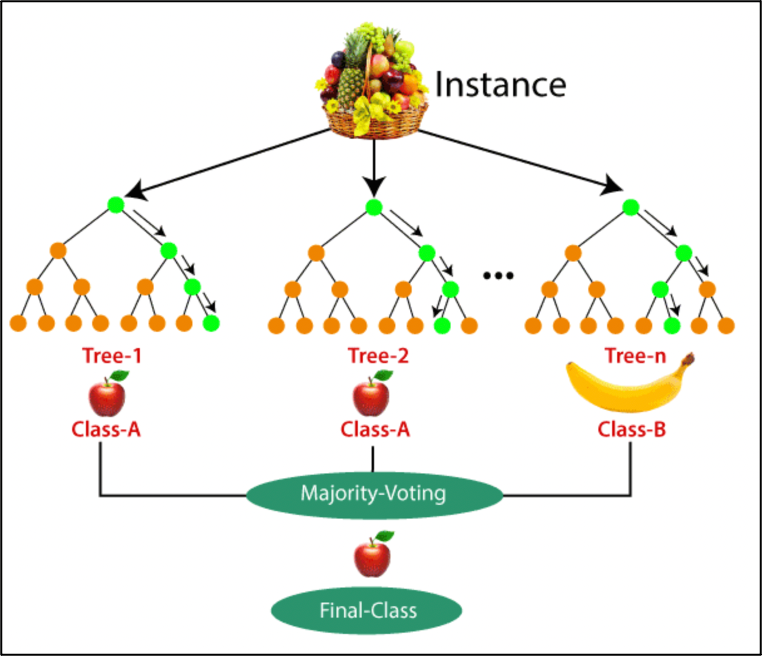

In [51]:
# Kamu buat model Random Forest Classifier — algoritma machine learning untuk klasifikasi.
# n_estimators=150 artinya model terdiri dari 150 pohon keputusan (decision trees).
# max_depth=None berarti pohon keputusan dibuat tanpa batasan kedalaman maksimal.
# n_jobs=-1 artinya training dilakukan secara paralel di semua core CPU yang tersedia supaya lebih cepat.
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()

# (target kelas).
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 15.589 / Predict time: 0.178 ---- Precision: 1.0 / Recall: 0.828 / Accuracy: 0.976


Fungsi score (kemungkinan dari sklearn.metrics.precision_recall_fscore_support) digunakan untuk menghitung metrik evaluasi:

Precision: Dari semua data yang diprediksi sebagai kelas positif (spam), berapa banyak yang benar-benar positif.

Recall: Dari semua data yang sebenarnya positif (spam), berapa banyak yang berhasil ditemukan (diprediksi positif).

Fscore: Harmonik rata-rata precision dan recall, sebagai ukuran keseimbangan keduanya.

train_support: jumlah data dari kelas yang dihitung.



Print ringkasan:

Fit time: waktu training

Predict time: waktu prediksi

Precision & Recall: kualitas prediksi model untuk kelas spam

Accuracy: persentase prediksi yang benar dari keseluruhan data testing



# Random Forest — Penjelasan untuk Pemula

## Apa itu Random Forest?

Random Forest adalah metode machine learning yang menggunakan banyak **decision tree (pohon keputusan)** untuk membuat prediksi. Metode ini sering digunakan untuk masalah klasifikasi (contoh: spam atau bukan spam) dan regresi.

## Bagaimana Cara Kerja Random Forest?

1. **Membangun Banyak Pohon Keputusan**  
   Random Forest membuat banyak pohon keputusan (misal 100 pohon).

2. **Latih Setiap Pohon dengan Data Berbeda**  
   Tiap pohon dilatih dengan subset data training yang berbeda, dan juga melihat subset fitur (aturan) yang berbeda secara acak.

3. **Prediksi dengan Voting Mayoritas**  
   Setelah semua pohon membuat prediksi, Random Forest memilih hasil akhir berdasarkan mayoritas suara (voting):  
   - Jika mayoritas pohon bilang "spam", maka email itu diprediksi sebagai spam.  
   - Jika mayoritas pohon bilang "bukan spam", maka email itu diprediksi bukan spam.

## Kenapa Harus Pakai Random Forest?

- **Akurasi Tinggi:** Kombinasi banyak pohon membuat prediksi lebih tepat daripada satu pohon saja.  
- **Mengurangi Overfitting:** Random Forest cenderung tidak "hafal" data training, sehingga bisa bekerja baik untuk data baru.  
- **Fleksibel:** Bisa digunakan untuk masalah klasifikasi dan regresi.

## Analogi Sederhana

Bayangkan kamu bertanya ke banyak orang untuk menebak apakah suatu buah adalah apel:

- Orang A: "Kalau warnanya merah, pasti apel."  
- Orang B: "Kalau bulat dan halus, pasti apel."  
- Orang C: "Kalau kecil, pasti apel."

Kalau mayoritas bilang "apel", maka kamu yakin buah itu apel. Random Forest bekerja dengan cara yang mirip — gabungan pendapat banyak pohon keputusan.

---

Kalau kamu ingin, saya bisa bantu buatkan contoh kode Random Forest sederhana atau jelaskan cara memilih parameter pentingnya.


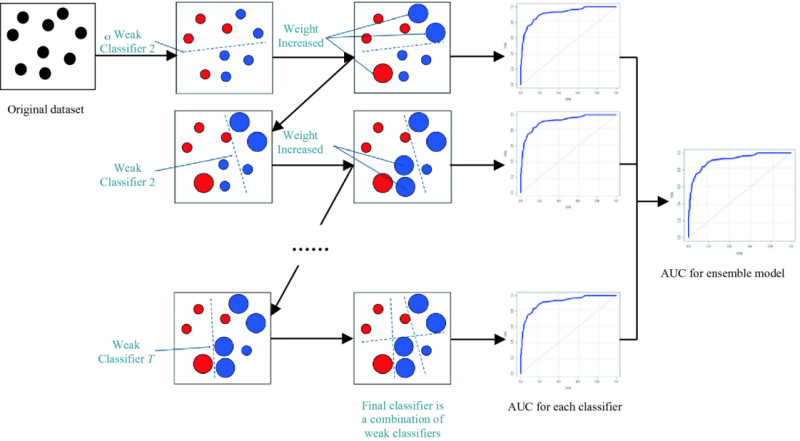

In [52]:
# Membuat model Gradient Boosting dengan 150 pohon keputusan (n_estimators=150).
# Setiap pohon maksimal kedalaman 11 (max_depth=11).
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train) #Melatih model dengan data training (X_train_vect dan label y_train).
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 236.091 / Predict time: 0.133 ---- Precision: 0.903 / Recall: 0.892 / Accuracy: 0.971


# Gradient Boosting: Penjelasan untuk Pemula

Gradient Boosting adalah metode machine learning yang membangun model secara **bertahap**, dengan cara memperbaiki kesalahan model sebelumnya.

---

## Cara Kerja Gradient Boosting

### 1. Mulai dari model sederhana
- Model pertama biasanya pohon keputusan kecil (decision tree).
- Model ini dipakai untuk prediksi awal, tapi biasanya belum akurat.

### 2. Hitung kesalahan (residual)
- Dihitung selisih antara hasil prediksi dan hasil sebenarnya.
- Selisih ini disebut residual, yang menjadi fokus untuk perbaikan berikutnya.

### 3. Buat model baru untuk memperbaiki kesalahan
- Model kedua dibangun untuk memprediksi residual dari model pertama.
- Jadi model ini fokus memperbaiki kesalahan model pertama.

### 4. Gabungkan model baru dengan model lama
- Prediksi model kedua ditambahkan ke prediksi model pertama.
- Prediksi gabungan ini lebih baik dari model pertama saja.

### 5. Ulangi proses
- Setiap model berikutnya dibuat untuk memperbaiki kesalahan gabungan dari semua model sebelumnya.
- Proses ini diulang sampai jumlah model yang diinginkan tercapai.

### 6. Hasil akhir
- Model akhir adalah gabungan banyak pohon keputusan kecil yang bekerja sama.
- Prediksi gabungan ini biasanya jauh lebih akurat daripada satu model tunggal.

---

## Intinya:
- Gradient Boosting adalah proses bertahap membangun model.
- Tiap langkah fokus memperbaiki kesalahan sebelumnya.
- Hasilnya model yang sangat akurat dengan menggabungkan banyak model kecil.

---

Kalau kamu mau, bisa juga dibuat ilustrasi visual supaya lebih gampang paham!


# Perbedaan Gradient Boosting vs Random Forest

| Aspek                 | Random Forest                         | Gradient Boosting                      |
|-----------------------|-------------------------------------|--------------------------------------|
| **Prinsip dasar**      | Menggabungkan banyak pohon keputusan secara **parallel** (independen) | Membangun pohon keputusan secara **berurutan**, setiap pohon memperbaiki kesalahan sebelumnya |
| **Bagaimana model dibuat** | Membuat banyak pohon keputusan secara acak dan independen, kemudian voting hasilnya | Membuat pohon secara bertahap, tiap pohon fokus memperbaiki error dari pohon sebelumnya |
| **Tujuan**             | Mengurangi variansi (variance), meningkatkan kestabilan model | Mengurangi bias (bias) dan error secara bertahap |
| **Kecepatan training** | Lebih cepat, karena pohon bisa dibuat secara paralel | Lebih lambat, karena harus dibuat berurutan |
| **Overfitting**        | Lebih tahan overfitting karena averaging hasil | Lebih rawan overfitting jika tidak di-tune dengan baik |
| **Interpretasi**       | Lebih mudah untuk interpretasi hasil voting dari banyak pohon | Lebih kompleks karena hasil gabungan bertahap |
| **Parameter penting**  | Jumlah pohon (n_estimators), jumlah fitur yang dipakai tiap split | Jumlah pohon (n_estimators), learning rate, kedalaman pohon (max_depth) |

---

## Ringkasan singkat:
- **Random Forest** adalah ensemble learning yang menggabungkan banyak pohon yang dibuat secara acak dan paralel.
- **Gradient Boosting** adalah metode boosting yang membuat pohon secara bertahap dan fokus memperbaiki kesalahan model sebelumnya.

---

Kalau kamu mau, aku bisa bantu contoh kode atau ilustrasi supaya lebih paham juga!


# Pemetaan Random Forest, Gradient Boosting, dan Cross Validation

| Komponen           | Fungsi Utama                                                | Siapa yang Melakukan Training?                  | Siapa yang Mengatur Cross Validation?           |
|--------------------|-------------------------------------------------------------|-------------------------------------------------|-------------------------------------------------|
| **Random Forest**   | Model ensemble yang membuat banyak pohon keputusan secara *parallel* | Kamu yang memanggil `.fit()` untuk melatih model | Cross Validation menggunakan model ini untuk training di tiap fold, tapi cross validation sendiri dijalankan oleh fungsi seperti `cross_val_score` atau `KFold` |
| **Gradient Boosting** | Model ensemble yang membuat banyak pohon keputusan secara *berurutan* (boosting) | Kamu yang memanggil `.fit()` untuk melatih model | Sama seperti di atas, cross validation dijalankan oleh fungsi `cross_val_score` dengan model ini sebagai parameter |
| **Cross Validation**| Teknik evaluasi model dengan membagi data jadi beberapa fold, lalu model dilatih & diuji secara bergantian | Tidak melatih model langsung, tapi memanggil `.fit()` pada model di tiap fold | Fungsi seperti `cross_val_score` yang mengatur pembagian data, training, dan evaluasi model secara otomatis |

---

## Penjelasan Singkat

- **Random Forest** dan **Gradient Boosting** adalah **model machine learning** yang kamu buat dan latih menggunakan `.fit()`.
- **Cross Validation** adalah **metode evaluasi** yang membagi data menjadi beberapa bagian (fold), kemudian melatih dan menguji model berkali-kali secara bergantian untuk mendapatkan hasil evaluasi yang lebih valid.
- Jadi, **cross validation tidak membuat model**, tapi mengatur proses training dan testing model secara otomatis berulang-ulang.

---

## Contoh Kode

### Training dan testing manual (train/test split biasa):
```python
rf = RandomForestClassifier()
rf.fit(X_train, y_train)   # Melatih model sekali
y_pred = rf.predict(X_test)
